<a href="https://colab.research.google.com/github/AniRony/CIFAR10_with_KERAS/blob/main/CIFAR_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [61]:
import os
import numpy as np                   
import matplotlib.pyplot as plt      
from keras.models import Sequential  
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.models import load_model
import keras
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from PIL import Image

In [5]:
from keras.datasets import cifar10
data = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
(X_tr, y_tr), (X_te, y_te) = data

In [7]:
print((X_tr.shape, y_tr.shape), (X_te.shape, y_te.shape))

((50000, 32, 32, 3), (50000, 1)) ((10000, 32, 32, 3), (10000, 1))


In [8]:
X_tr[0].shape

(32, 32, 3)

## Labels and their corresponding meanings

In [60]:
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
for i in range(10):
  print(f"{i} : {labels[i]}")

0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck


##A Plot to Check

deer


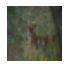

In [17]:
item = 10
plt.figure(figsize=(1,1))
plt.imshow(X_tr[item])
plt.axis('off')
print(labels[y_tr[item][0]])

## MinMax Standardization of x_train and x_test RGB Matrix and Flattening y_train,y_test data

In [18]:
# Reduce pixel values
x_train, x_test = X_tr / 255.0, X_te / 255.0
 
# flatten the label values
y_train, y_test = y_tr.flatten(), y_te.flatten()

### A Simple Collage of different image samples

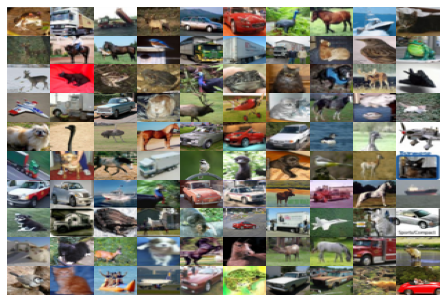

In [21]:
n_rows = 10
n_cols = 10
fig, ax = plt.subplots(n_rows, n_cols)
k = 0
 
for i in range(n_rows):
    for j in range(n_cols):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
        ax[i][j].axis('off')
        
plt.tight_layout(pad=0.0)
plt.show()

## DNN - Coding Section
- Convolution Image 
- BatchNormalization

In [22]:
# number of classes
n_class = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", n_class)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(n_class, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [23]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [24]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=60)

Epoch 1/60
1563/1563 [==============================] - 25s 8ms/step - loss: 1.3097 - accuracy: 0.5488 - val_loss: 0.9947 - val_accuracy: 0.6526
Epoch 2/60
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8453 - accuracy: 0.7078 - val_loss: 0.7638 - val_accuracy: 0.7355
Epoch 3/60
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6915 - accuracy: 0.7607 - val_loss: 0.7427 - val_accuracy: 0.7476
Epoch 4/60
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5851 - accuracy: 0.7990 - val_loss: 0.6646 - val_accuracy: 0.7784
Epoch 5/60
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5017 - accuracy: 0.8269 - val_loss: 0.6791 - val_accuracy: 0.7790
Epoch 6/60
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4271 - accuracy: 0.8521 - val_loss: 0.6615 - val_accuracy: 0.7854
Epoch 7/60
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3609 - accuracy: 0.8745 - val_loss: 0.6261 - val_ac

## Shifiting Pixels and then giving a Horizontal Flip of the Images 
- to train the mirror images of the same image too

In [25]:
batch_size = 32
data_generator = keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=60)

Epoch 1/60
1562/1562 [==============================] - 30s 19ms/step - loss: 0.5479 - accuracy: 0.8265 - val_loss: 0.5122 - val_accuracy: 0.8364
Epoch 2/60
1562/1562 [==============================] - 30s 19ms/step - loss: 0.4463 - accuracy: 0.8545 - val_loss: 0.4740 - val_accuracy: 0.8487
Epoch 3/60
1562/1562 [==============================] - 30s 19ms/step - loss: 0.4132 - accuracy: 0.8641 - val_loss: 0.4304 - val_accuracy: 0.8557
Epoch 4/60
1562/1562 [==============================] - 31s 20ms/step - loss: 0.3825 - accuracy: 0.8720 - val_loss: 0.4561 - val_accuracy: 0.8501
Epoch 5/60
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3698 - accuracy: 0.8765 - val_loss: 0.4510 - val_accuracy: 0.8557
Epoch 6/60
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3556 - accuracy: 0.8807 - val_loss: 0.4473 - val_accuracy: 0.8568
Epoch 7/60
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3436 - accuracy: 0.8843 - val_loss: 0.4462 -

## Accuracy of Training Vs Accuracy of validation set wrt Epochs 

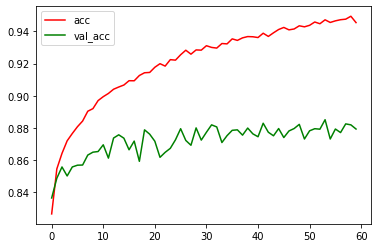

In [26]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

## Testing the Images from the X_test file

Original label is airplane and predicted label is airplane


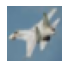

In [27]:
# select the image from our test dataset
image_number = 10

# display the image
plt.figure(figsize=(1,1))
plt.imshow(x_test[image_number])
plt.axis("off")

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


In [75]:
import random

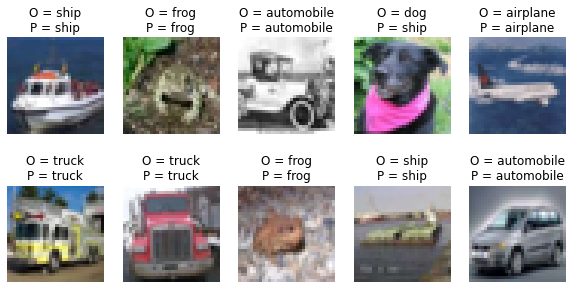

In [79]:
#plt.rcParams['figure.figsize'] = (10,1) # Make the figures a bit bigger
plt.figure(figsize=(10,5))
for i in range(10):
  num = random.randint(0,10001)
  plt.subplot(2,5,i+1)
  img_array = np.array(x_test[num])
  p = img_array.reshape(1, 32, 32, 3)
  predicted_label = labels[model.predict(p).argmax()]
  original_label = labels[y_test[num]]
  plt.title("O = {}\nP = {}".format(original_label, predicted_label))
  plt.imshow(img_array)
  plt.axis("off")

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive'

## Saving the model in the particular folder

In [28]:
model.save('/content/gdrive/My Drive/DEEP LEARNING/CIFAR_KERAS/CIFAR10_MODEL.h5')

## Checking Model Accuracy wrt to Google Downloaded Images

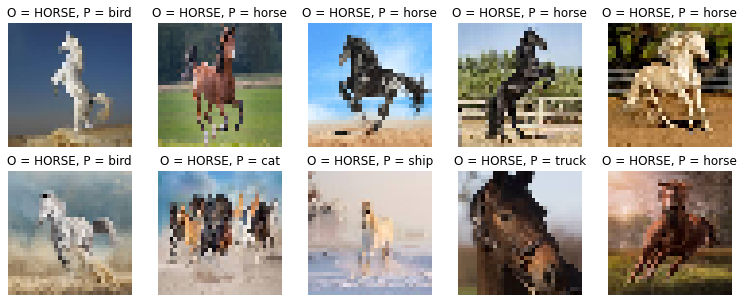

In [59]:
plt.rcParams['figure.figsize'] = (13,5) # Make the figures a bit bigger

for i in range(10):
  plt.subplot(2,5,i+1)
  image = Image.open(f'/content/gdrive/MyDrive/DEEP LEARNING/CIFAR_KERAS/horse_data/hq_horse{i}.jpg')
  new_image = image.resize((32, 32),resample=Image.NEAREST)
  img_array = img_to_array(new_image).reshape(32,32,3)
  img_array = img_array/255.0
  p = img_array.reshape(1, 32, 32, 3)
  predicted_label = labels[model.predict(p).argmax()]
  original_label = 'HORSE'
  #plt.title(original_label)
  plt.title("O = {}, P = {}".format(original_label, predicted_label))
  plt.imshow(img_array)
  plt.axis("off")


In [47]:
image = Image.open('/content/gdrive/MyDrive/DEEP LEARNING/CIFAR_KERAS/hq_horse.jpg')
new_image = image.resize((32, 32),resample=Image.NEAREST,reducing_gap=3.0)
new_image.save('/content/gdrive/MyDrive/DEEP LEARNING/CIFAR_KERAS/lq_horse.jpg')